# 206052K - Bhagya Karunarathna
# Data Storm Project

Beverage Company XYZ manufactures and distributes over 40 beverage goods to over 100 retailers. However, when it comes to making crucial decisions like resource allocation, distribution, and launching new beverage items, they lack a data-driven decision-making process. Instead of employing data to optimize these judgments, the corporation makes them qualitatively based on experience. These methodologies have recently been shown to be inefficient, and the corporation wishes to enhance its decision-making process using sophisticated analytics and machine learning techniques, such as automated store profiling on current and new locations based on sales and consumer behavior. 

Thus, the aim of this project is to design and implement an advanced analytics system that Beverages Company XYZ can utilize to undertake store profiling and analytics.

### Import the numpy, pandas and matplot libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Provide the path as a string file

The historical transactions data frame contains the historical transaction data of stores with 488,788 records collected from each customer purchase. The respective data frame is imported to gather data for the analysis of the performance of stores based on their sales and customer behavior.

In [2]:
path_transactions = r'C:\Users\acer\OneDrive - University of Moratuwa\UOM\Semester 5 - CA\S5 - Data Wrangling DA3110\Data Storm - 15.06.2023\Tables\Historical-transaction-data.csv'
filename_transactions = 'Historical-transaction-data.csv'

To identify stores that are performing well and that are not, the 'Store info' data frame is imported. So that recommendations could be made to improve low-rated stores, to allocate resources, and to optimize the process of item range decisions.  

In [3]:
path_stores = r'C:\Users\acer\OneDrive - University of Moratuwa\UOM\Semester 5 - CA\S5 - Data Wrangling DA3110\Data Storm - 15.06.2023\Tables\Store-info.csv'
filename_stores = 'Store-info.csv'

### Read the 'Historical Transactions data set' using pd.read_csv(path)

In [143]:
df_transactions = pd.read_csv(path_transactions)
df_transactions

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5
...,...,...,...,...,...,...,...
473969,NECTO 1.5L,2021-12-09T00:00:00.000Z,NaN,X21A,SHOP056,440,3
473970,LEMONADE 1.5L,2021-12-02T00:00:00.000Z,NaN,LV2L,SHOP018,220,2
473971,FIT O ORANGE 200ML,2021-11-19T00:00:00.000Z,NaN,VC4O,SHOP077,210,4
473972,CREAM SODA 1.5L,2021-12-03T00:00:00.000Z,NaN,MSBQ,SHOP077,440,3


### Inspect the number of rows and columns in the Historical Transaction data set

In [5]:
rows = df_transactions.shape[0]  
columns = df_transactions.shape[1]
print('rows:',rows,'columns:',columns)

rows: 473974 columns: 7


There are 473974 transactions with item description, transaction date, invoice id, customer id, shop id, item price, and quantity sold in the historical transaction data set.

### Displaying the variables of Historical Transaction data set

In [24]:
df_transactions.columns

Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold'],
      dtype='object')

### Displaying the data types of the variables

In [25]:
df_transactions.dtypes

item_description     object
transaction_date     object
invoice_id          float64
customer_id          object
shop_id              object
item_price            int64
quantity_sold         int64
dtype: object

Considering the above data types, the 'invoice_id' can not be a float. It is an object. 

Also for more precise store profiling and data analysis, it is more appropriate to represent the price of an item as a float. Beacuse prices are continuous values and often has decimal values. Using an integer will decrease precision since any decimal values would be truncated. In this data set, the 'item_price' is represented as an integer. It should be converted to float to get more precise analyses. 

Thus, the aforementioned variable data types have been converted as follows. 

In [174]:
# Convert column 'invoice_id' to object
df_transactions['invoice_id'] = df_transactions['invoice_id'].astype(object)
df_transactions['invoice_id']

0             147.0
1             371.0
2             484.0
3             484.0
4            1310.0
            ...    
432104    8014206.0
432105    8304754.0
432106    8304807.0
432107    8313570.0
432108    8325631.0
Name: invoice_id, Length: 432109, dtype: object

In [175]:
# Convert coulmn 'item_price' to float
df_transactions['item_price'] = df_transactions['item_price'].astype(float)
df_transactions['item_price']

0         220.0
1         220.0
2         160.0
3         150.0
4         210.0
          ...  
432104     60.0
432105     35.0
432106    220.0
432107     35.0
432108    220.0
Name: item_price, Length: 432109, dtype: float64

In [176]:
# Displaying the resulting data types of variables 
df_transactions.dtypes

item_description     object
transaction_date     object
invoice_id           object
customer_id          object
shop_id              object
item_price          float64
quantity_sold         int64
dtype: object

### Check for negative values in the 'quantity sold' column

In [63]:
negative_qty = df_transactions[df_transactions['quantity_sold'] < 0]

# Display the resulting dataframe
print(negative_qty)

                    item_description          transaction_date invoice_id  \
5016               GINGER BEER 500ML  2021-11-26T00:00:00.000Z  1453866.0   
20896               CREAM SODA 500ML  2021-12-02T00:00:00.000Z  3109501.0   
46371                    NECTO 500ML  2021-10-24T00:00:00.000Z  4013203.0   
57703                 FIT O MANGO 1L  2021-12-02T00:00:00.000Z  3596802.0   
67227               GINGER BEER 1.5L  2021-10-23T00:00:00.000Z  2428573.0   
98031                 GINGER BEER 1L  2021-10-22T00:00:00.000Z  1120071.0   
124439       CREAM SODA APPLE POP 1L  2021-10-18T00:00:00.000Z  2127500.0   
136437              GINGER BEER 1.5L  2021-12-13T00:00:00.000Z  2148619.0   
181365                GINGER BEER 1L  2021-11-26T00:00:00.000Z  1282080.0   
215038          FIT O MIXED FRUIT 1L  2021-11-19T00:00:00.000Z   466077.0   
279383  BOTTLED DRINKING WATER 500ML  2021-11-16T00:00:00.000Z  2349620.0   
314634       CREAM SODA APPLE POP 1L  2021-10-18T00:00:00.000Z  2266881.0   

Records of 'quantity sold' column can not be negative. The negative values could be an error or mistake in the data. Else, it is possible that they represent a return or refund. The salesperson might have mistakenly record the quantity sold as '-1' when recording returns or refunds of items instead of decreasing the total quantity sold by 1 to reflect the return.

Assuming that negative values represent a return or refund and since all the negative values for each item equals '-1', it has been decided to replace '-1' with '0' to indicate no sales on respective items. 

In [64]:
df_transactions['quantity_sold'] = df_transactions['quantity_sold'].apply(lambda x: max(0, x))

In [66]:
# Checking the resulting dataframe
negative_qty = df_transactions[df_transactions['quantity_sold'] < 0]
print(negative_qty)

Empty DataFrame
Columns: [item_description, transaction_date, invoice_id, customer_id, shop_id, item_price, quantity_sold]
Index: []


### Checking the null values in the Historical Transaction data set

##### Checking the null values in the columns

In [52]:
df_transactions.isnull().any()

item_description     True
transaction_date    False
invoice_id           True
customer_id         False
shop_id             False
item_price          False
quantity_sold       False
dtype: bool

##### Counting the number of rows with missing values in a given column

In [53]:
df_transactions.isnull().sum()

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
dtype: int64

##### The percentage of missing values for each of the variables

In [71]:
missing_transactions = df_transactions.isnull().sum() / len(df_transactions) * 100
missing_transactions

item_description    7.580163
transaction_date    0.000000
invoice_id          1.333406
customer_id         0.000000
shop_id             0.000000
item_price          0.000000
quantity_sold       0.000000
dtype: float64

In this data set, missing values can be found in 'item description' and 'invoice id' columns. 

These missing values can not be filled with a specific value such as mode. Because 'invoice id' is a unique string and differs from one sale to another. And we can not manipulate the missing values in 'item description' with a specific value like mode because it would give false insights on sales. In this project, the aim is to analyze the performance of stores based on sales and customer behaviour. Hence, the analyses could be misleading if the missing values in the 'item description' are filled with the mode. 

Also the percentage of missing values for 'item description' and 'invoice id' columns are less than 10%. Therefore, we could drop the null values to analyze the 'Historical transaction' data set. 

In [146]:
# Drop the null values in 'item description'
df_transactions.dropna(subset = ['item_description'],axis=0, inplace = True) 

In [147]:
# Drop the null values in 'invoice_id'
df_transactions.dropna(subset = ['invoice_id'],axis=0, inplace = True) 

In [148]:
after_drop = df_transactions.shape[0]
after_drop 

432109

In [144]:
print("Number of dropped rows {}".format(len(df_transactions) - after_drop))

Number of dropped rows 41865


41865 transactions with null values have been dropped from the 'Historical transactions' data set.

##### Reset the index values after dropping NaN rows.

In [151]:
df_transactions.reset_index(drop = True, inplace = True)
df_transactions.shape

(432109, 7)

### Read the 'Store info data set' using pd.read_csv(path) 

In [95]:
df_stores = pd.read_csv(path_stores)
df_stores

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low
...,...,...,...
119,SHOP087,527,NaN
120,SHOP050,411,NaN
121,SHOP061,699,NaN
122,SHOP056,597,NaN


### Inspect the number of rows and columns in the Store Info data set

In [45]:
rows = df_stores.shape[0]  
columns = df_stores.shape[1]
print('rows:',rows,'columns:',columns)

rows: 124 columns: 3


There are 124 stores with shops space and store profile in the 'Store Info data set'. 

### Displaying the variables of Store Info data set

In [46]:
df_stores.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile'], dtype='object')

### Displaying the data types of the variables

In [107]:
df_stores.dtypes

shop_id            object
shop_area_sq_ft     int64
shop_profile       object
dtype: object

In this data set, the 'shop_area_sq_ft' is represented as an integer. However, floor areas are continuous values and often has decimal values. Using an integer will decrease precision since any decimal values would be truncated. 

Since the analysis is done to evaluate the performance of stores and to allocate resources, such as equipment, marketing, and staffing, to improve the performance of low-rated stores, using the most precised data type would give better analyses. Hence, the 'shop area' should be converted to float as follows.

In [180]:
df_stores['shop_area_sq_ft'] = df_stores['shop_area_sq_ft'].astype(float)
df_stores['shop_area_sq_ft']

0      528.0
1      676.0
2      676.0
3      676.0
4      676.0
       ...  
119    527.0
120    411.0
121    699.0
122    597.0
123    676.0
Name: shop_area_sq_ft, Length: 124, dtype: float64

In [181]:
# Displaying the resulting data types of variables 
df_stores.dtypes

shop_id             object
shop_area_sq_ft    float64
shop_profile        object
dtype: object

### Checking the null values in the Store Info data set

##### Checking the null values in the columns

In [69]:
df_stores.isnull().any()

shop_id            False
shop_area_sq_ft    False
shop_profile        True
dtype: bool

##### Counting the number of rows with missing values in a given column

In [96]:
df_stores.isnull().sum()

shop_id             0
shop_area_sq_ft     0
shop_profile       24
dtype: int64

##### The percentage of missing values for each of the variables

In [72]:
missing_stores = df_stores.isnull().sum() / len(df_stores) * 100
missing_stores

shop_id             0.000000
shop_area_sq_ft     0.000000
shop_profile       19.354839
dtype: float64

19.35% of 'store profile' data is missing in the 'Store info' data set.

### Provide the path to 'Evaluation-data' as a string file

In [73]:
path_evaluation = r'C:\Users\acer\OneDrive - University of Moratuwa\UOM\Semester 5 - CA\S5 - Data Wrangling DA3110\Data Storm - 15.06.2023\Tables\Evaluation-data.csv'
filename_evaluation = 'Evaluation-data.csv'

### Read the 'Evaluation data set' using pd.read_csv(path) 

In [179]:
df_evaluation = pd.read_csv(path_evaluation)
df_evaluation.head()

,shop_id,shop_profile
0,SHOP046,Low
1,SHOP024,Low
2,SHOP023,Low
3,SHOP097,Moderate
4,SHOP044,Moderate


### Displaying the variables of Store Info data set

In [76]:
df_evaluation.columns

Index(['shop_id', 'shop_profile'], dtype='object')

### Inspect the number of rows and columns in the Evaluation data set

In [75]:
rows = df_evaluation.shape[0]  
columns = df_evaluation.shape[1]
print('rows:',rows,'columns:',columns)

rows: 24 columns: 2


There are 24 stores with store profile in the 'Evaluation data set'. The number of rows in this data set matches the missing values count of the 'Store Info data set'.

It appears that the data in the csv file named 'Evaluation-data' consists of the missing values for shop profile. Hence, it is appropriate to merge two csv files using an 'outer join'. Because this method includes all rows from both data sets. Also, this method results in the least amount of data loss. The csv file named 'Evaluation-data' consists the rows that have matching 'shop id' with respective 'shop profile' which are missing in the 'Store-info' data set.

Therefore, the two data sets could be merged using an 'outer join' as below.

In [110]:
merged_stores = pd.merge(df_stores, df_evaluation, on='shop_id', how='outer')
merged_stores

,shop_id,shop_area_sq_ft,shop_profile_x,shop_profile_y
0,SHOP047,528.0,Moderate,NaN
1,SHOP009,676.0,High,NaN
2,SHOP083,676.0,Low,NaN
3,SHOP117,676.0,Low,NaN
4,SHOP042,676.0,Low,NaN
...,...,...,...,...
119,SHOP087,527.0,NaN,Moderate
120,SHOP050,411.0,NaN,Low
121,SHOP061,699.0,NaN,Moderate
122,SHOP056,597.0,NaN,High


In [111]:
# Create a new 'shop_profile' column by combining 'shop_profile_x' and 'shop_profile_y'
merged_stores['shop_profile'] = merged_stores['shop_profile_x'].combine_first(merged_stores['shop_profile_y'])

# Drop 'shop_profile_x' and 'shop_profile_y' columns
merged_stores = merged_stores.drop(['shop_profile_x', 'shop_profile_y'], axis=1)

# Display the resulting dataframe
print(merged_stores)

     shop_id  shop_area_sq_ft shop_profile
0    SHOP047            528.0     Moderate
1    SHOP009            676.0         High
2    SHOP083            676.0          Low
3    SHOP117            676.0          Low
4    SHOP042            676.0          Low
..       ...              ...          ...
119  SHOP087            527.0     Moderate
120  SHOP050            411.0          Low
121  SHOP061            699.0     Moderate
122  SHOP056            597.0         High
123  SHOP070            676.0          Low

[124 rows x 3 columns]


### Inspect the number of rows and columns in the merged store data set

In [112]:
rows = merged_stores.shape[0]  
columns = merged_stores.shape[1]
print('rows:',rows,'columns:',columns)

rows: 124 columns: 3


### Displaying the variables of merged store data set

In [113]:
merged_stores.columns

Index(['shop_id', 'shop_area_sq_ft', 'shop_profile'], dtype='object')

### Displaying the data types of the variables

In [114]:
merged_stores.dtypes

shop_id             object
shop_area_sq_ft    float64
shop_profile        object
dtype: object

### Checking the null values in the merged store data set

##### Checking the null values in the columns

In [115]:
merged_stores.isnull().any()

shop_id            False
shop_area_sq_ft    False
shop_profile       False
dtype: bool

In [116]:
# Save the dataset as csv file
merged_stores.to_csv('Store-info-new.csv', index = True)

Inspecting the number of rows and columns in the merged store data set, there are 124 stores with shop space and store profile. This equals the number of rows and columns in the 'Store info data set' which has some null values. After the merge, there are no null values in the resulting 'merged stores data set'. It appears that the 'Store info' data set and 'Evaluation' data set are merged accurately. 

Since the missing value problem in 'Store info' data set is handled, we could merge 'Historical transaction' data set and the 'merged stores' data set to analyze the performance of stores and to automate store profiling .

### Merging 'Historical transaction data' and 'merged stores data'

In [275]:
merged_df = pd.merge(df_transactions, merged_stores, on='shop_id')
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2,678.0,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2,678.0,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2,678.0,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1,678.0,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440.0,1,678.0,Moderate
...,...,...,...,...,...,...,...,...,...
432104,FIT O ORANGE 1L,2021-11-28T00:00:00.000Z,7027965.0,8XOU,SHOP072,290.0,2,617.0,High
432105,NECTO 1.5L,2021-12-03T00:00:00.000Z,7029132.0,0YBY,SHOP072,440.0,3,617.0,High
432106,GINGER BEER 400ML,2021-12-08T00:00:00.000Z,7030122.0,CTB0,SHOP072,100.0,2,617.0,High
432107,FIT O ORANGE 200ML,2021-12-11T00:00:00.000Z,7030809.0,HXMG,SHOP072,140.0,2,617.0,High


In [197]:
merged_df.isnull().sum()

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
shop_area_sq_ft     0
shop_profile        0
dtype: int64

There are no null values in the merged data frame.

### Identify and handle outliers

In [154]:
import seaborn as sns

##### Identify duplicate values

In [276]:
merged_df[merged_df.duplicated()]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
25,CREAM SODA 500ML,2021-12-11T00:00:00.000Z,1000231.0,TUP7,SHOP008,100.0,1,678.0,Moderate
26,CREAM SODA 500ML,2021-12-11T00:00:00.000Z,1000231.0,TUP7,SHOP008,100.0,1,678.0,Moderate
30,CREAM SODA 500ML,2021-12-12T00:00:00.000Z,4000320.0,U4X4,SHOP008,100.0,2,678.0,Moderate
31,CREAM SODA 500ML,2021-12-12T00:00:00.000Z,4000320.0,U4X4,SHOP008,100.0,1,678.0,Moderate
39,GINGER BEER 1L,2021-12-11T00:00:00.000Z,4000175.0,86JZ,SHOP008,150.0,2,678.0,Moderate
...,...,...,...,...,...,...,...,...,...
432002,CREAM SODA 500ML,2021-11-12T00:00:00.000Z,7024867.0,MCC9,SHOP072,200.0,2,617.0,High
432081,GINGER BEER 1L,2021-10-30T00:00:00.000Z,4285552.0,SDVY,SHOP072,150.0,1,617.0,High
432082,GINGER BEER 1L,2021-10-30T00:00:00.000Z,4285552.0,SDVY,SHOP072,150.0,1,617.0,High
432096,CREAM SODA 500ML,2021-10-21T00:00:00.000Z,7020454.0,MDLP,SHOP072,100.0,1,617.0,High


In the merged data frame, there are 29808 duplicated transactions. These duplicated values need to be dropped.

In [277]:
merged_df = merged_df[~merged_df.duplicated()]
merged_df

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2,678.0,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2,678.0,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2,678.0,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1,678.0,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440.0,1,678.0,Moderate
...,...,...,...,...,...,...,...,...,...
432104,FIT O ORANGE 1L,2021-11-28T00:00:00.000Z,7027965.0,8XOU,SHOP072,290.0,2,617.0,High
432105,NECTO 1.5L,2021-12-03T00:00:00.000Z,7029132.0,0YBY,SHOP072,440.0,3,617.0,High
432106,GINGER BEER 400ML,2021-12-08T00:00:00.000Z,7030122.0,CTB0,SHOP072,100.0,2,617.0,High
432107,FIT O ORANGE 200ML,2021-12-11T00:00:00.000Z,7030809.0,HXMG,SHOP072,140.0,2,617.0,High


##### Impute outliers

Text(0.5, 1.0, 'PDF Curve-Item Price')

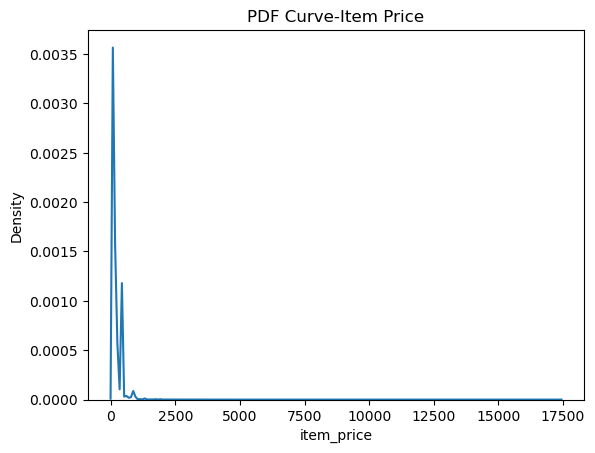

In [165]:
# Plotting outliers in 'item price' variable
sns.kdeplot(merged_df['item_price'])
plt.title("PDF Curve-Item Price")

The probability density curve is right-skewed. There is a possibility of having outliers in the 'item price' variable.

In [278]:
# Identify outliers in 'item price' variable

# Calculate Interquartile range 
q3 = merged_df['item_price'].quantile(0.75)
q1 = merged_df['item_price'].quantile(0.25)
iqr = q3 - q1

# Since the probability density curve is right-skewed, outliers lie above the 3rd quartile+1.5*IQR
upper_limit = q3 + 1.5*iqr

merged_df.loc[merged_df['item_price'] > upper_limit]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,440.0,1,678.0,Moderate
5,CREAM SODA APPLE POP 1L,2021-12-10T00:00:00.000Z,2000106.0,QPBO,SHOP008,450.0,4,678.0,Moderate
9,CREAM SODA 1.5L,2021-12-12T00:00:00.000Z,1000356.0,0ADP,SHOP008,440.0,3,678.0,Moderate
14,SODA PET 1.5L,2021-12-13T00:00:00.000Z,4000383.0,N0MP,SHOP008,480.0,3,678.0,Moderate
22,GINGER BEER 1.5L,2021-12-11T00:00:00.000Z,1000136.0,VX3B,SHOP008,880.0,5,678.0,Moderate
...,...,...,...,...,...,...,...,...,...
432065,STRAWBERRY MILK 180ML,2021-11-13T00:00:00.000Z,3397947.0,3QP3,SHOP072,700.0,10,617.0,High
432073,CREAM SODA 1.5L,2021-12-01T00:00:00.000Z,3401525.0,N4C3,SHOP072,440.0,3,617.0,High
432078,SODA PET 1.5L,2021-12-14T00:00:00.000Z,3403531.0,E518,SHOP072,480.0,4,617.0,High
432091,CREAM SODA 1.5L,2021-10-19T00:00:00.000Z,7019966.0,HZ7A,SHOP072,440.0,1,617.0,High


In [279]:
# Impute outliers in 'item price' variable with the median of 'item price'
merged_df.loc[merged_df['item_price'] > upper_limit, 'item_price'] = np.median(merged_df['item_price'])

In [280]:
merged_df.loc[432065:432073]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
432065,STRAWBERRY MILK 180ML,2021-11-13T00:00:00.000Z,3397947.0,3QP3,SHOP072,220.0,10,617.0,High
432066,SODA 1L,2021-11-20T00:00:00.000Z,3399415.0,NQN0,SHOP072,110.0,2,617.0,High
432067,LEMONADE 500ML,2021-11-20T00:00:00.000Z,3399415.0,NQN0,SHOP072,200.0,3,617.0,High
432068,BOTTLED DRINKING WATER 500ML,2021-11-23T00:00:00.000Z,3400006.0,6J93,SHOP072,35.0,2,617.0,High
432069,BOTTLED DRINKING WATER 500ML,2021-11-24T00:00:00.000Z,3400134.0,F8VP,SHOP072,35.0,1,617.0,High
432070,CREAM SODA 1.5L,2021-11-25T00:00:00.000Z,3400417.0,YR68,SHOP072,220.0,2,617.0,High
432071,FIT O ORANGE 1L,2021-11-30T00:00:00.000Z,3401471.0,AT8X,SHOP072,290.0,1,617.0,High
432072,CREAM SODA APPLE POP 1L,2021-11-30T00:00:00.000Z,3401471.0,AT8X,SHOP072,150.0,1,617.0,High
432073,CREAM SODA 1.5L,2021-12-01T00:00:00.000Z,3401525.0,N4C3,SHOP072,220.0,3,617.0,High


Text(0.5, 1.0, 'PDF Curve-Quantity Sold')

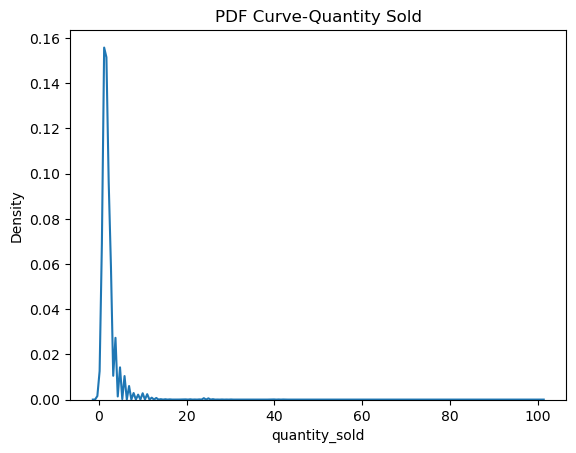

In [166]:
# Plotting outliers in 'quantity sold' variable
sns.kdeplot(merged_df['quantity_sold'])
plt.title("PDF Curve-Quantity Sold")

The probability density curve is right-skewed. There is a possibility of having outliers in the 'quantity sold' variable.

In [281]:
# Identify outliers in 'quantity sold' variable

# Calculate Interquartile range 
q3 = merged_df['quantity_sold'].quantile(0.75)
q1 = merged_df['quantity_sold'].quantile(0.25)
iqr = q3 - q1

# Since the probability density curve is right-skewed, outliers lie above the 3rd quartile+1.5*IQR
upper_limit = q3 + 1.5*iqr

merged_df.loc[merged_df['quantity_sold'] > upper_limit]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
5,CREAM SODA APPLE POP 1L,2021-12-10T00:00:00.000Z,2000106.0,QPBO,SHOP008,220.0,4,678.0,Moderate
16,FIT O MIXED FRUIT 200ML,2021-12-11T00:00:00.000Z,1000133.0,WM9P,SHOP008,210.0,4,678.0,Moderate
22,GINGER BEER 1.5L,2021-12-11T00:00:00.000Z,1000136.0,VX3B,SHOP008,220.0,5,678.0,Moderate
77,GINGER BEER 1.5L,2021-12-11T00:00:00.000Z,2000296.0,GMH1,SHOP008,220.0,4,678.0,Moderate
83,SODA 500ML,2021-12-14T00:00:00.000Z,2000644.0,GA2U,SHOP008,210.0,4,678.0,Moderate
...,...,...,...,...,...,...,...,...,...
431938,SODA PET 1.5L,2021-10-29T00:00:00.000Z,2455730.0,41YE,SHOP072,220.0,4,617.0,High
431953,BOTTLED DRINKING WATER 500ML,2021-12-05T00:00:00.000Z,2462979.0,UB3P,SHOP072,175.0,6,617.0,High
432027,TONIC PET 500ML,2021-11-13T00:00:00.000Z,1476988.0,920R,SHOP072,220.0,8,617.0,High
432065,STRAWBERRY MILK 180ML,2021-11-13T00:00:00.000Z,3397947.0,3QP3,SHOP072,220.0,10,617.0,High


It is obvious that the variable 'quantity sold' has outliers in the merged data frame. However, tit would not be appropriate to impute these outliers with mean or median since the aim of the project is analyzing stores based on theire performances. 'Quantity sold' is a key measurement of performance. Thus, it would not be meaningful to impute these outliers. If these outliers are replaced, then we would not get insights on high performing stores. 

Text(0.5, 1.0, 'Boxplot-Shop Area')

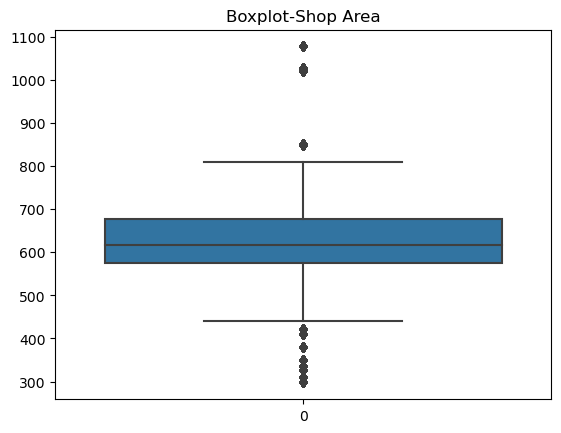

In [169]:
# Plotting outliers in 'shop area' variable
sns.boxplot(merged_df['shop_area_sq_ft'])
plt.title("Boxplot-Shop Area")

There are observations that lie above and below the whiskers. There is a possibility of having outliers in the 'shop_area_sq_ft' variable.

In [282]:
# Identify outliers in 'shop area' variable

# Calculate Interquartile range 
q3 = merged_df['shop_area_sq_ft'].quantile(0.75)
q1 = merged_df['shop_area_sq_ft'].quantile(0.25)
iqr = q3 - q1

# Outliers lie above and below the whiskers
upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

merged_df.loc[(merged_df['quantity_sold'] > upper_limit) & (merged_df['quantity_sold'] < lower_limit)]

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile


In [283]:
# Impute outliers in 'shop area' variable with the median of 'shop area'
merged_df.loc[merged_df['shop_area_sq_ft'] > upper_limit, 'shop_area_sq_ft'] = np.median(merged_df['shop_area_sq_ft'])

In [284]:
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2,678.0,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2,678.0,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2,678.0,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1,678.0,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,220.0,1,678.0,Moderate


### Data Standardization

The process of transforming data into a standard format is known as data standardization. It allows easy compariosn between data. It also assists organizations in avoiding judgments based on incorrect or insufficient data.

In this meregd data set, the shop area is measured in square foot. Considering that the international standard for area measurement is square meters, the variable 'shop_area_sq_ft' is transformed to square meters by mathematical operation. This would enable the corporation to make data-driven decisons on resource allocation based on the standard scales. 

In [285]:
# transform square foot to square meter
merged_df['shop_area_sq_ft'] = 0.092903*merged_df['shop_area_sq_ft']

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\728829389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['shop_area_sq_ft'] = 0.092903*merged_df['shop_area_sq_ft']


In [286]:
# Rename column name from 'shop_area_sq_ft' to 'shop_area_sq_m'
merged_df.rename(columns = {'shop_area_sq_ft':'shop_area_sq_m'}, inplace = True)

# Display the transformed data
merged_df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\888058246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df.rename(columns = {'shop_area_sq_ft':'shop_area_sq_m'}, inplace = True)


,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220.0,2,62.988234,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160.0,2,62.988234,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150.0,2,62.988234,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,220.0,1,62.988234,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,220.0,1,62.988234,Moderate


### Data Normalization

The merged data frame has variables having features with different scales or units of measurement (e.g.: item_price, quantity_sold,shop_area_sq_m). By transforming their values to fall within the same range, normalization guarantees that all variables have equal weight in the analysis.  Normalization makes it easier to compare data with different scales by transforming their values to fall within the same range. Moreover, normalization decreases the impact of outliers by scaling the extreme values to fall within the same range as other observations.

In [287]:
# Replace (original value) by (original value)/(maximum value) to normalize the data

# Data normalization --- 'item price'
merged_df['item_price'] = merged_df['item_price']/merged_df['item_price'].max()

# Data normalization --- 'quantity sold'
merged_df['quantity_sold'] = merged_df['quantity_sold']/merged_df['quantity_sold'].max()

# Data normalization --- 'shop area'
merged_df['shop_area_sq_m'] = merged_df['shop_area_sq_m']/merged_df['shop_area_sq_m'].max()

merged_df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\1154100898.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['item_price'] = merged_df['item_price']/merged_df['item_price'].max()
C:\Users\acer\AppData\Local\Temp\ipykernel_3260\1154100898.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['quantity_sold'] = merged_df['quantity_sold']/merged_df['quantity_sold'].max()
C:\Users\acer\AppData\Local\Temp\ipykernel_3260\1154100898.py:10: SettingWithCopyWarning: 
A value is trying to be set on

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate


The variables, item_price, quantity_sold, and shop_area_sq_m can not take negative values. Thus, when normalizing the data frame has been restrained to a positive quadrent by dividing the original data value by maximum value. 

### Binning

Upto the recent moment, the Beverages Company XYZ has evaluated existing outlets as High, Moderate, and Lowon based on the salesperson's views. However, these measurements were found to be be inefficient. Therefore, binning technique could be used to improve their decision-making process by providing an analytical solution to identify the profile of given outlets as High, Moderate or Low.

There would be three bins namely, high, moderate, and low. And it is assumed that store profiling is done based on their performances where the 'quantity sold' is considered to be the performance measurement. 

In [288]:
bins = np.linspace(min(merged_df['quantity_sold']), max(merged_df['quantity_sold']),4)
bins

array([-0.00990099,  0.32673267,  0.66336634,  1.        ])

In [289]:
group_names = ['High','Moderate','Low']

In [290]:
# Converting the values into a class.
merged_df['quantity_sold-binned'] = pd.cut(merged_df['quantity_sold'], bins, labels = group_names, include_lowest = True)
merged_df[['quantity_sold','quantity_sold-binned']].head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\488197875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['quantity_sold-binned'] = pd.cut(merged_df['quantity_sold'], bins, labels = group_names, include_lowest = True)


,quantity_sold,quantity_sold-binned
0,0.019802,High
1,0.019802,High
2,0.019802,High
3,0.009901,High
4,0.009901,High


In [291]:
merged_df['quantity_sold-binned'].value_counts()

High        402168
Moderate       123
Low             10
Name: quantity_sold-binned, dtype: int64

Text(0.5, 1.0, 'Store Profiling')

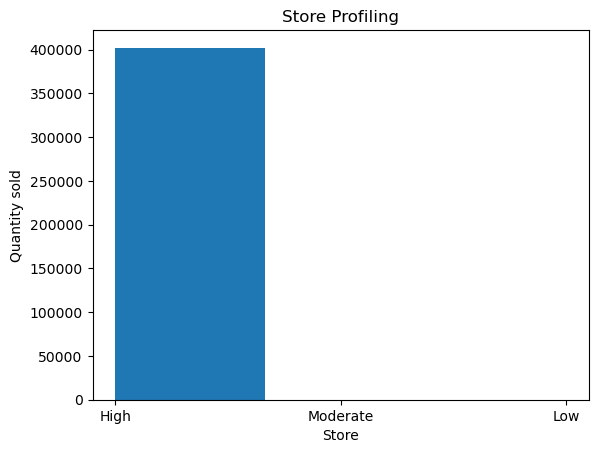

In [249]:
%matplotlib inline
plt.hist(merged_df['quantity_sold-binned'], bins = 3)

# Set x/y labels and plot title
plt.xlabel('Store')
plt.ylabel('Quantity sold')
plt.title("Store Profiling")

In [292]:
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile,quantity_sold-binned
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate,High
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate,High
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate,High
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate,High
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate,High


#### Updating the 'Testing-data' file with shop prfile values from 'Binning'

In [252]:
# Load the csv file
df_testing = pd.read_csv(r'C:\Users\acer\OneDrive - University of Moratuwa\UOM\Semester 5 - CA\S5 - Data Wrangling DA3110\Data Storm - 15.06.2023\Tables\Testing-data.csv')

In [254]:
df_testing.head()

,shop_id,shop_profile
0,SHOP046,NaN
1,SHOP024,NaN
2,SHOP023,NaN
3,SHOP097,NaN
4,SHOP044,NaN


In [263]:
# Make updates to the DataFrame
df_testing = df_testing.assign(shop_profile=merged_df['quantity_sold-binned'])
df_testing.drop('quantity_sold-binned', axis=1, inplace=True)

In [264]:
df_testing.head()

,shop_id,shop_profile
0,SHOP046,High
1,SHOP024,High
2,SHOP023,High
3,SHOP097,High
4,SHOP044,High


In [265]:
# Save the updated data frame to the 'Testing-data' file
df_testing.to_csv('Testing-data.csv', index = True)

### Dummy Variable/ Indicator Variables

Dummy variables are frequently used in regression analysis to assess changes in the value of the dependent variable in respone to different groups or to investigate nonlinear effects.

In this merged data frame we could identify the changes in the preformance of stores in response to 'item price' and 'shop area'. To do the regression analysis with dummy variables, the 'item price' and 'shop area' are converted into classes. Then create two dummies to analyse the changes in the preformance of stores in response to these two variables.

##### Converting 'item price' to a dummy variable

In [266]:
bins = np.linspace(min(merged_df['item_price']), max(merged_df['item_price']),4)
bins

array([0.09090909, 0.39393939, 0.6969697 , 1.        ])

In [267]:
group_names = ['High','Reasonable','Low']

In [268]:
# Converting the values into a class.
merged_df['item_price-binned'] = pd.cut(merged_df['item_price'], bins, labels = group_names, include_lowest = True)
merged_df[['item_price','item_price-binned']].head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\561471884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['item_price-binned'] = pd.cut(merged_df['item_price'], bins, labels = group_names, include_lowest = True)


,item_price,item_price-binned
0,0.571429,Reasonable
1,0.415584,Reasonable
2,0.389610,High
3,0.571429,Reasonable
4,0.571429,Reasonable


In [270]:
dummy_variable_price = pd.get_dummies(merged_df['item_price-binned'])
dummy_variable_price.head()

,High,Reasonable,Low
0,0,1,0
1,0,1,0
2,1,0,0
3,0,1,0
4,0,1,0


In [271]:
# Merge data frame "merged_df" and "dummy_variable_price"
merged_df = pd.concat([merged_df, dummy_variable_price], axis = 1)
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile,quantity_sold-binned,item_price-binned,High,Reasonable,Low
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate,High,Reasonable,0,1,0
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate,High,Reasonable,0,1,0
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate,High,High,1,0,0
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate,High,Reasonable,0,1,0
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate,High,Reasonable,0,1,0


In [273]:
# Drop original column "item price" from "merged_df"
merged_df.drop('item_price-binned', axis = 1, inplace = True)
merged_df.head()  

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile,quantity_sold-binned,High,Reasonable,Low
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate,High,0,1,0
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate,High,0,1,0
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate,High,1,0,0
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate,High,0,1,0
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate,High,0,1,0


In [274]:
merged_df.describe()

,item_price,quantity_sold,shop_area_sq_m,High,Reasonable,Low
count,402301.000000,402301.000000,402301.000000,402301.000000,402301.000000,402301.000000
mean,0.464439,0.018581,0.752154,0.380474,0.517329,0.102197
std,0.182959,0.015547,0.121117,0.485504,0.499700,0.302908
min,0.090909,-0.009901,0.367901,0.000000,0.000000,0.000000
25%,0.285714,0.009901,0.697531,0.000000,0.000000,0.000000
50%,0.571429,0.019802,0.761728,0.000000,1.000000,0.000000
75%,0.571429,0.019802,0.834568,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the above statistical measures with dummy variable: item price, the corporation could make data-driven decisions on pricing, resource allocation, identifying profitable items, optimize item range decisions, etc. 

##### Converting 'shop_area' to a dummy variable

In [293]:
bins = np.linspace(min(merged_df['shop_area_sq_m']), max(merged_df['shop_area_sq_m']),4)
bins

array([0.36790123, 0.57860082, 0.78930041, 1.        ])

In [294]:
group_names = ['High space','Moderate space','Low space']

In [295]:
# Converting the values into a class.
merged_df['shop_area_sq_m-binned'] = pd.cut(merged_df['shop_area_sq_m'], bins, labels = group_names, include_lowest = True)
merged_df[['shop_area_sq_m','shop_area_sq_m-binned']].head()

C:\Users\acer\AppData\Local\Temp\ipykernel_3260\4242138117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['shop_area_sq_m-binned'] = pd.cut(merged_df['shop_area_sq_m'], bins, labels = group_names, include_lowest = True)


,shop_area_sq_m,shop_area_sq_m-binned
0,0.837037,Low space
1,0.837037,Low space
2,0.837037,Low space
3,0.837037,Low space
4,0.837037,Low space


In [296]:
dummy_variable_area = pd.get_dummies(merged_df['shop_area_sq_m-binned'])
dummy_variable_area.head()

,High space,Moderate space,Low space
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [297]:
# Merge data frame "merged_df" and "dummy_variable_area"
merged_df = pd.concat([merged_df, dummy_variable_area], axis = 1)
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile,quantity_sold-binned,shop_area_sq_m-binned,High space,Moderate space,Low space
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate,High,Low space,0,0,1
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate,High,Low space,0,0,1
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate,High,Low space,0,0,1
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate,High,Low space,0,0,1
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate,High,Low space,0,0,1


In [298]:
# Drop original column "shop_area_sq_m" from "merged_df"
merged_df.drop('shop_area_sq_m-binned', axis = 1, inplace = True)
merged_df.head() 

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_m,shop_profile,quantity_sold-binned,High space,Moderate space,Low space
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,0.571429,0.019802,0.837037,Moderate,High,0,0,1
1,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.415584,0.019802,0.837037,Moderate,High,0,0,1
2,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,0.389610,0.019802,0.837037,Moderate,High,0,0,1
3,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000053.0,VT9C,SHOP008,0.571429,0.009901,0.837037,Moderate,High,0,0,1
4,GINGER BEER 1.5L,2021-12-10T00:00:00.000Z,1000057.0,8QLS,SHOP008,0.571429,0.009901,0.837037,Moderate,High,0,0,1


In [299]:
merged_df.describe()

,item_price,quantity_sold,shop_area_sq_m,High space,Moderate space,Low space
count,402301.000000,402301.000000,402301.000000,402301.000000,402301.000000,402301.000000
mean,0.464439,0.018581,0.752154,0.107534,0.500377,0.392090
std,0.182959,0.015547,0.121117,0.309791,0.500000,0.488217
min,0.090909,-0.009901,0.367901,0.000000,0.000000,0.000000
25%,0.285714,0.009901,0.697531,0.000000,0.000000,0.000000
50%,0.571429,0.019802,0.761728,0.000000,1.000000,0.000000
75%,0.571429,0.019802,0.834568,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Based on the above statistical measures with dummy variable: shop area, the corporation could make data-driven decisions on  resource allocation, identifying profitable stores, optimize item range decisions, etc. 